##Task 1

###Improve the Previous Model

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/media/samyog/My Folder/AI and ML/AI-and-ML/Week-5/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/media/samyog/My Folder/AI and ML/AI-and-ML/Week-5/FruitinAmazon/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


###Build a Deeper CNN Model with Batch Normalization & Dropout

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,276,618 (4.87 MB)

 Trainable params: 1,276,170 (4.87 MB)

 Non-trainable params: 448 (1.75 KB)

###Transfer Learning with VGG16

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load VGG16 without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


###Add Custom Layers

In [7]:
num_classes = len(train_generator.class_indices)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)


###Compile & Train the Model

In [14]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 10s/step - accuracy: 0.8265 - loss: 0.7505 - val_accuracy: 0.7000 - val_loss: 1.1352
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 9s/step - accuracy: 0.8760 - loss: 0.5896 - val_accuracy: 0.4667 - val_loss: 1.3691
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 9s/step - accuracy: 0.8277 - loss: 0.6233 - val_accuracy: 0.5000 - val_loss: 1.2578
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 10s/step - accuracy: 0.8662 - loss: 0.5794 - val_accuracy: 0.6667 - val_loss: 1.1739
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 10s/step - accuracy: 0.9062 - loss: 0.4882 - val_accuracy: 0.7000 - val_loss: 1.1226
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 9s/step - accuracy: 0.9488 - loss: 0.4255 - val_accuracy: 0.6333 - val_loss: 1.1323
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 10s/step - accuracy: 0.8766 - loss: 0.4193 - val_accuracy: 0.6333 - val_loss: 1.1702
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 10s/step - accuracy: 0.9497 - loss: 0.3743 - val_accuracy: 0.6667 - val_loss: 1.0998
Epo

###Model Analysis

In [15]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,309,076 (62.21 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,062,926 (4.05 MB)

###Visualize Training Performance

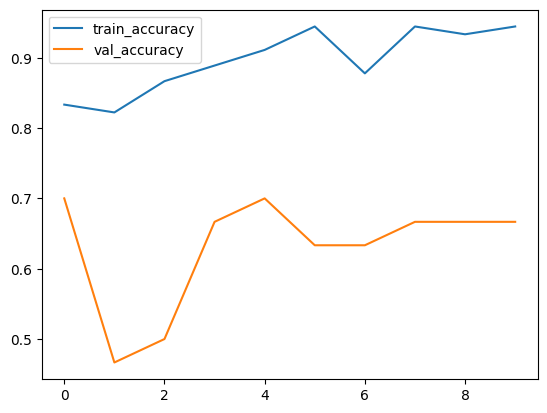

In [16]:
import matplotlib.pyplot as plt

# history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


##Task 2


###Data Preparation & Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/media/samyog/My Folder/AI and ML/AI-and-ML/Week-5/FruitinAmazon/train'
val_dir = '/media/samyog/My Folder/AI and ML/AI-and-ML/Week-5/FruitinAmazon/test'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for inference output
)

num_classes = len(train_generator.class_indices)


Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


###Load VGG16 (Pre-trained) and Freeze Layers




In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False


###Add Custom Layers

In [11]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

###Compile & Train the Model

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 10s/step - accuracy: 0.2296 - loss: 2.0241 - val_accuracy: 0.2000 - val_loss: 1.8860
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 10s/step - accuracy: 0.1449 - loss: 1.9973 - val_accuracy: 0.2000 - val_loss: 1.8365
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 9s/step - accuracy: 0.1135 - loss: 2.0418 - val_accuracy: 0.2667 - val_loss: 1.7990
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 9s/step - accuracy: 0.2241 - loss: 1.8739 - val_accuracy: 0.2667 - val_loss: 1.7706
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 9s/step - accuracy: 0.2054 - loss: 1.8702 - val_accuracy: 0.3000 - val_loss: 1.7491
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 10s/step - accuracy: 0.2388 - loss: 1.7712 - val_accuracy: 0.3000 - val_loss: 1.7320
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 9s/step - accuracy: 0.1275 - loss: 1.7988 - val_accuracy: 0.4333 - val_loss: 1.7182
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 9s/step - accuracy: 0.1220 - loss: 1.8906 - val_accuracy: 0.4333 - val_loss: 1.7060
Epoch

### Evaluate + Classification Report

In [15]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on validation data
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report:\n", report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Classification Report:
               precision    recall  f1-score   support

        acai       0.60      0.60      0.60         5
     cupuacu       0.33      0.40      0.36         5
    graviola       0.50      0.60      0.55         5
     guarana       0.43      0.60      0.50         5
     pupunha       0.00      0.00      0.00         5
      tucuma       0.33      0.40      0.36         5

    accuracy                           0.43        30
   macro avg       0.37      0.43      0.40        30
weighted avg       0.37      0.43      0.40        30



/media/samyog/My Folder/AI and ML/AI-and-ML/jupyter_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/samyog/My Folder/AI and ML/AI-and-ML/jupyter_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/samyog/My Folder/AI and ML/AI-and-ML/jupyter_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

###Inference Output

In [17]:
print("Sample Predictions:")
for i in range(5):
    print(f"Image {i+1}: Predicted - {class_labels[y_pred_classes[i]]} | True - {class_labels[y_true[i]]}")

Sample Predictions:
Image 1: Predicted - acai | True - acai
Image 2: Predicted - acai | True - acai
Image 3: Predicted - cupuacu | True - acai
Image 4: Predicted - acai | True - acai
Image 5: Predicted - guarana | True - acai
